----
# Study aims
----
> Here, we [...] examine the medusa (free-swimming jellyfish) stage of the hydrozoan Clytia
> hemisphaerica, with dual motivations. First, Clytia is a powerful, emerging model system spanning
> multiple fields, from evolutionary and developmental biology to regeneration and neuroscience.
> While previous work has characterized a number of cell types in the Clytia medusa, a
> whole-organism atlas of transcriptomic cell types has been lacking. Such an atlas is a critical
> resource for the Clytia community and an important addition to the study of cell types across
> animal phylogeny.
> 
> Second, emerging multiplexing techniques present new opportunities for system-level studies of
> cell types and their changing states at unprecedented resolution in whole organisms. The Clytia
> medusa offers an appealing platform for pioneering these studies. It is small, transparent, and
> has simple tissues and organs, stem cell populations actively replenishing many cell types in
> mature animals, and remarkable regenerative capacity. Furthermore, the 1-cm-diameter adult medusae
> used in this study contain on the order of $10^5$ cells, making it possible to sample cells
> comprehensively across a whole animal in a cost-effective manner using current scRNA-seq
> technology. In this study, we generate a cell atlas for the Clytia medusa while simultaneously
> performing a whole-organism perturbation study, providing the first medusa single-cell dataset and
> an examination of changing cell states across the organism. Our work also provides a
> proof-of-principle for perturbation studies in nontraditional model organisms, using multiplexing
> technology and a reproducible workflow with lessened reliance on functional annotation, from the
> experimental implementation to the data processing and analysis.

# Study design

> Experimental design of the starvation experiment showing (1) images of control versus 4-day
> starved animals (scale bars, 0.5 cm), (2) dissociation of individual medusa and chemical tagging
> of cells with ClickTags to enable multiplexed scRNA-seq, (3) pooling of cells and library
> generation from lysed cells to generate (4) sequencing libraries for the multiplexed cDNA and
> ClickTag data and create (5) single-cell resolved gene expression count matrices from all animals:

<div>
<img src="Fig1.JPG" width="600"/>
</div>

<!-- # Task 1 - experimental design

#### 1. Why is single-cell RNA-seq the method of choice?

<span style="color:green">Answer</span>

#### 2. Why is _Clytia_ a good model system?

<span style="color:green">Answer</span>

#### 3. What are the aims of the study?

<span style="color:green">Answer</span>

#### 4. How will the experimental design achieve the stated aims of the study?

<span style="color:green">Answer</span>

#### 5. Identify the biological and technical replicates.

<span style="color:green">Answer</span> -->


----
# Task 1 - basic single-cell RNA-seq analysis
----

## Theory:

#### 1. What are the basic steps for the analysis of single-experiment scRNA-seq data?

<span style="color:green">Answer</span>

#### 2. What do we want to achieve with normalisation? Name as many methods for normalisation as you can.

<span style="color:green">Answer</span>

#### 3. Explain a normalisation method of your choice using your own words.

<span style="color:green">Answer</span>

#### 4. What do we want to achieve with variance stabilisation? What are two methods to achieve it?

<span style="color:green">Answer</span>

#### 5. Why do we perform dimensionality reduction? Why might PCA be a good choice?

<span style="color:green">Answer</span>

#### 6. Why do we cluster? Does clustering make sense in the context of scRNA-seq data?

<span style="color:green">Answer</span>

#### 7. What is a way to connect clustering to cell types?

<span style="color:green">Answer</span>

## Exercise:

Read in the data from the fed animals of batch 1. Preprocess and integrate the data and cluster to
reveal putative cell types. Try to explain your steps and decisions so that an outside observer can
follow the analysis.

In [ ]:
import numpy as np
import pandas as pd

import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = "/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/clytia/anndata/"

In [3]:
fed1 = sc.read_h5ad(data + "fed_batch0.h5ad")

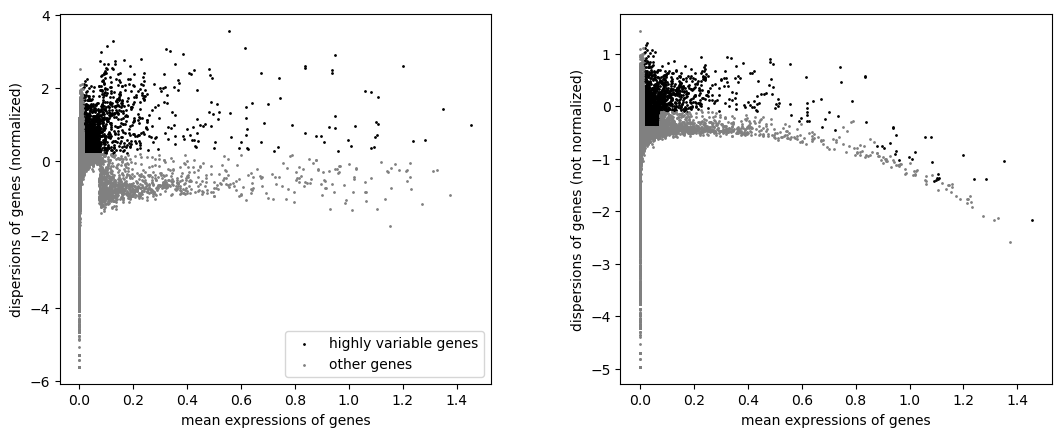

In [4]:
sc.pp.normalize_per_cell(fed1)
sc.pp.log1p(fed1)
filter_result = sc.pp.filter_genes_dispersion(fed1.X, min_mean=0.0125, max_mean=4.5, min_disp=0.2)
sc.pl.filter_genes_dispersion(filter_result)

In [5]:
fed1 = fed1[:, filter_result.gene_subset].copy()
fed1.raw = fed1

In [6]:
sc.pp.scale(fed1, max_value=10)
sc.tl.pca(fed1, n_comps=60)
sc.pp.neighbors(fed1,n_neighbors=150, n_pcs=60, random_state=42)

sc.tl.leiden(fed1, resolution=5, random_state=42)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
import cluster

In [8]:
cluster.merge_clusters(fed1, "leiden", num_genes=50)

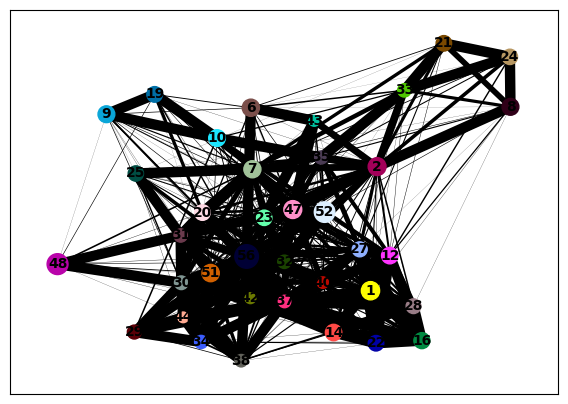

In [9]:
sc.tl.paga(fed1, groups='leiden_merged')
sc.pl.paga(fed1, color=['leiden_merged'])

In [10]:
sc.tl.umap(fed1, random_state=42, spread=2.5, min_dist = 0.8, init_pos='paga')

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


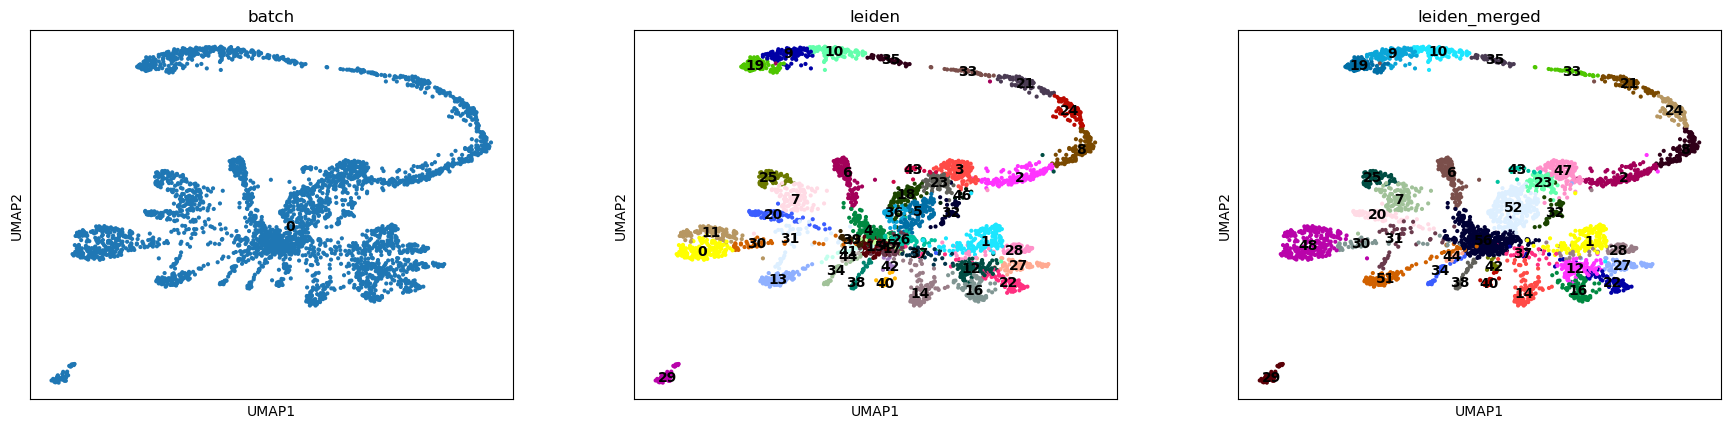

In [11]:
sc.pl.umap(fed1, color=["batch", "leiden", "leiden_merged"], legend_loc='on data')

----
# Task 2 - Integration
----

## Theory:

#### 1. What are possible sources of batch effect in scRNA-seq data?

<span style="color:green">Answer</span>

#### 2. Why is batch effect a problem in scRNA-seq data?

<span style="color:green">Answer</span>

#### 3. Name some strategies to remove batch effect.

<span style="color:green">Answer</span>

## Exercise:

Read in the data from the fed animals of batch 0. Integrate with the cells from batch 1. Demonstrate
that the integration was successful. Try to explain your steps and decisions so that an outside
observer can follow the analysis.

----
# Task 3 - Advanced scRNA-seq analysis
----

## Theory:

#### 1. What is the evolutionary definition of cell types?

<span style="color:green">Answer</span>

#### 2. What predictions does the theory make about the data?

<span style="color:green">Answer</span>


## Exercise:

Identify the cell cluster assigned to you by using its distinct genome partition.

The evolutionary definition of cell types implies hierarchical relationships between cell types
within and between species. Cluster the integrated data and make these hierarchical relationships
visible.

Try to explain your steps and decisions so that an outside observer can follow the analysis.

----
# Task 4 - Cross-species comparisons
----

## Theory:

#### 1. What are possible problems that make cross-species comparisons challenging?

<span style="color:green">Answer</span>

#### 2. What predictions does the evolutionary cell type theory make about cross-species comparisons?

<span style="color:green">Answer</span>


## Exercise:

Get the 

Try to explain your steps and decisions so that an outside observer can follow the analysis.